# Estimator 이해 및 fit(), predict() 메소드
-----

사이킷런은 ML 모델 학습을 위해 `fit()` 메소드를, 학습된 모델의 예측을 위해 `predict()` 메소드를 제공합니다.

`지도학습의 경우 크게 분류(Classification)와 회귀(Regression)`의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해도 간단하게 학습과 예측 결과를 반환합니다.

사이킷런에서는 분류 알고리즘을 구현한 클래스를 `Classfier`로, 회귀 알고리즘을 구현한 클래스를 `Regressor`로 지칭합니다.

앞서 설명한 **`Classifier, Regressor를 합쳐서 Estimator 클래스라고 부릅니다.`**

**`즉 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator`**라고 부릅니다. 당연히 Estimator 클래스는 fit() 메소드와 predict()메소드를 내부에서 구현하고 있습니다.

`cross_val_score()`와 같은 evaluation 함수, `GridSearchCV`와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 `Estimator를 인자로 받습니다. `

인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 **`이 Estimator의 fir()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것입니다.`**

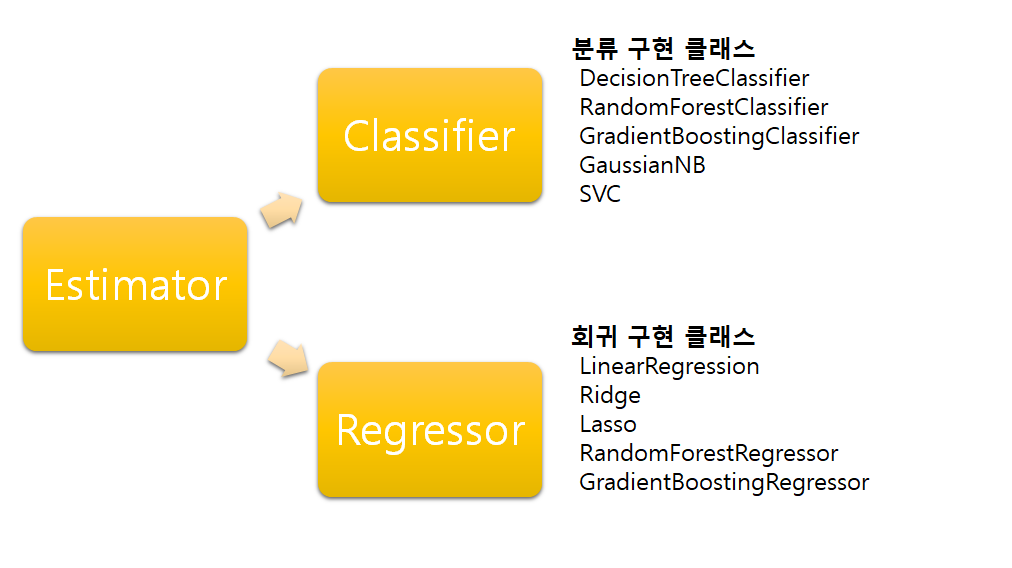

사이킷런에서는 `비지도 학습`인 차원축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 `대부분 fit()과 transform()을 적용`합니다.

비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 `입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업`입니다.

fit() 으로 변환을 위한 사전구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 **`실제 작업은 transform()으로 수행`**합니다.

사이킷런은 `fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공`합니다. 

하지만 `it_transform()은 사용시 약간의 주의`가 필요합니다. 이 주의할 사항에 대해서는 이후에 자세히 다루도록 하겠습니다.

# 사이킷런의 주요 모듈
---

사이킷런의 주요 모듈을 요약한 표입니다. 아래에 있는 모듈 외에도 많은 모듈이 있지만 자주 사용되는 핵심 모듈을 위주로 정리하였습니다.

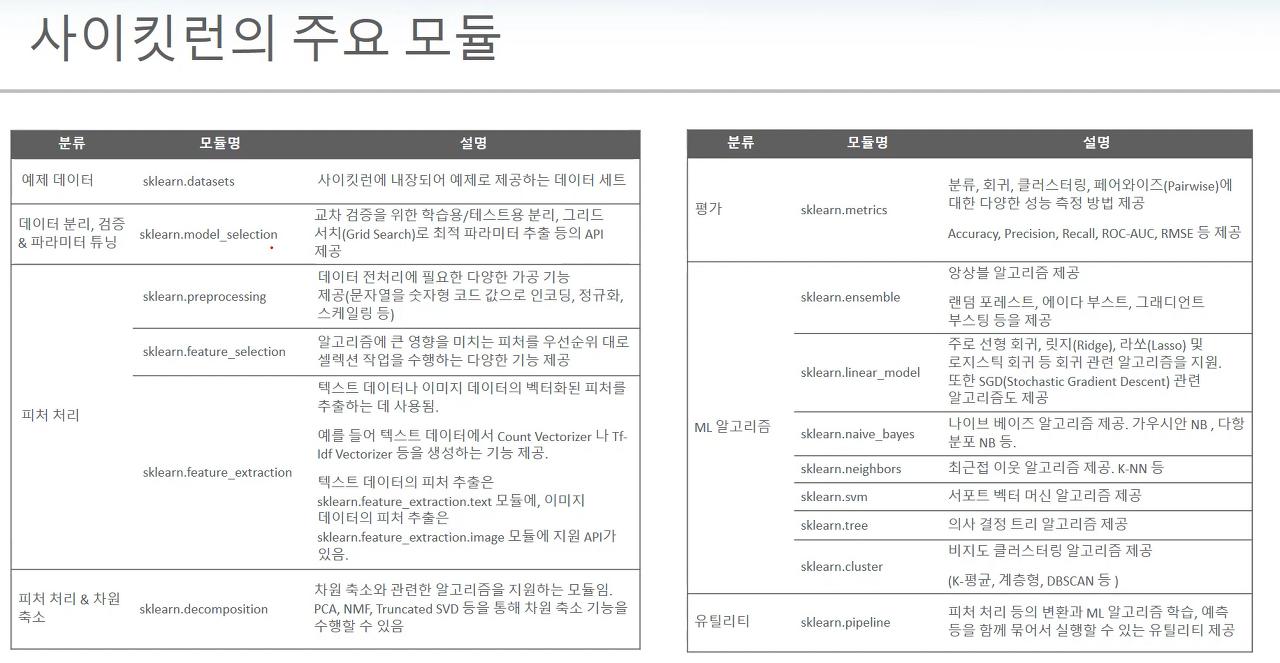

일반적으로 ML 모델을 구축하는 주요 프로세는 피처의 가공, 변경, 추출을 수행하는 `피처 처리(feature processing)`, `ML 알고리즘 학습/예측 수행`, 그리고 `모델 평가`의 단계를 반복적으로 수행하는 것입니다.

# 내장된 예제 데이터 세트
---

사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장되어 있습니다.

## 분류나 회귀 연습용 예제 데이터

- `datasets.load_boston() : 회귀 용도, 미국 보스턴 집 가격 데이터 세트`


- `datasets.load_breast_cancer() : 분류 용도, 위스콘신 유방암 악성/음성 레이블 데이터 세트`


- `datasets.load_diabetes() : 회귀 용도, 당뇨 데이터 세트`


- `datasets.load_digits() : 분류 용도, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트`


- `datasets.load_iris() : 분류 용도, 붓꽃 데이터 세트`

추가적으로 fetch 계열의 명령은 데이터의 크기가 커서 패키지에 내장되어있지 않고 인터넷에서 내려받은 다음 홈 디렉토리 아래의 scikit_learn_data 라는 서브 데릭토리에 저장한 후 추후 불러들이는 데이터입니다.

따라서 최초 사용 시에는 반드시 인터넷과 연결되어야 합니다.

- `fetch_covtype() : 회귀 분석용 토지 조사 자료`


- `fetch_20newsgroups() : 뉴스 구릅 텍스트 자료`


- `fetch_olivetti_faces() : 얼굴 이미자 자료`


- `fetch_lfw_people() : 얼굴 이미지 자료`


- `fetch_lfw_paris() : 얼굴 이미지 자료`


- `fetch_rcv1() : 로이터 뉴스 말뭉치`


- `fetch_mldata() : ML 웹사이트에서 다운로드`

## 분류와 클러스터링을 위한 표본 데이터 생성기

- `datasets.make_classifications()` 

    분류를 위한 데이터 세트를 생성. 특히 높은 상관도, 불필요한 속성 등 노이즈 효과를 위한 데이터를 무작위로 생성
    
    

- `datasets.make_blobs()` 

   클러스터링을 위한 데이터를 무작위로 생성. 군집 지정 개수에 때라 여러가지 클러스터링을 위한 데이터 세트 생성.

`분류나 회귀를 위한 연습용 데이터는 일반적으로 딕셔너리 형태로 되어있습니다.`

Key는 보통 data, target, target_name, feature_names, DESCR로 구성돼 있습니다. 개별 키가 가리키는 데이터 세트의 의미는 다음과 같습니다.

- `data : 피처의 데이터 세트`


- `target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트`


- `target_names : 개별 레이블의 이름`


- `feature_names : 피처의 이름`


- `DESCR : 데이터 세트에 대한 셜명과 각 피처의 설명`

data, target은 넘파이 배열(ndarray) 타입입니다. 

target_names, feature_names는 넘파이배열 또는 리스트 타입입니다.

DESCR은 string 타입입니다.

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


load_iris()의 반환 결과는 sklearn.utils.Bunch 클래스입니다. Bunch 클래스는 일종의 딕셔너리라고 생각합시다.

이처럼 데이터 세트에 내장된 대부분의 데이터 세트는 딕셔너리 형태의 값을 반환합니다.

In [16]:
# Bunch 클래스는 DIctionary 라고 생각하자.
# Key 값으로 아래의 것들을 갖는다.

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

데이터 키는 피쳐들의 데이터 값을 가리킵니다. 데이터 세트가 딕셔너리 형태이기 때문에 피처값을 추출하기 위해서는 데이터세트.data(또는 데이터 세트['data'])를 이용합니다.

In [17]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
# 데이터프레임으로 만들어보자

import pandas as pd

iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
